In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rando
import matplotlib
# matplotlib.rcParams['pdf.fonttype'] = 42

In [2]:
plt.style.use("ggplot")

In [3]:
plt.rcParams['axes.prop_cycle']

'#E24A33'
'#348ABD'
'#988ED5'
'#777777'
'#FBC15E'
'#8EBA42'
'#FFB5B8'


In [4]:
dim = ['MTO#1', 'MTO#50', 'MTO#100', 'MTO#200']

k_time = {}
k_time["10^2-ESF"] = [0.001789062,0.015140625,0.03028125,0.045492187]
k_time["10^3-ESF"] = [0.004242187,0.040335937,0.067671875,0.135523437]
k_time["10^4-ESF"] = [0.006765625,0.157351562,0.360773437,0.706015625]
k_time["10^5-ESF"] = [0.041890625,1.432429687,2.615765625,4.766421875]
k_time["10^6-ESF"] = [0.318117187,8.706835937,12.371257812,15.091765625]
k_time["SpOT"] = [6770.347859375,6770.347859375,6770.347859375,6770.347859375]
k_time["CLR"] = [2503.265875, 2503.265875, 2503.265875, 2503.265875]
k_time["KKRT"] = [2043.161859375,2043.161859375,2043.161859375,2043.161859375]
k_time["DH"] = [0, 0,0, 0]
k_time["PaXoS"] = [0, 0,0, 0]
k_time["CM"] = [22933.164345312, 22933.164345312, 22933.164345312, 22933.164345312]

k_cost = {}
k_cost["10^2-ESF"] = [0.03,1.26,2.52,5.05]
k_cost["10^3-ESF"] = [0.25,12.61,25.22,50.13]
k_cost["10^4-ESF"] = [1.74,86.99,173.97,344.46]
k_cost["10^5-ESF"] = [15.66,753.29,1372.62,2513.86]
k_cost["10^6-ESF"] = [156.57,4608.45,6560.39,7979.98]
k_cost["SpOT"] = [6266.9, 6266.9, 6266.9, 6266.9]
k_cost["CLR"] = [3590.56, 3590.56, 3590.56, 3590.56]
k_cost["KKRT"] = [78643.22,78643.22,78643.22, 78643.22]
k_cost["DH"] = [0, 0,0, 0]
k_cost["PaXoS"] = [0, 0,0, 0]
k_cost["CM"] = [96656.022, 96656.022,96656.022, 96656.022]


ablation_time = {}
ablation_time["Batch-ESF"] = [316.211320312,316.211320312,316.211320312,316.211320312]
ablation_time["Basic Pruning"] = [0.018257812,0.548679687,1.104359375,2.08071875]
ablation_time["Bucket Size Selection"] = [0.006257812,0.264679687,0.490359375,0.96471875]
ablation_time["Ciphertext Compression"] = [0.006257812,0.17275,0.344429687,0.688859375]
ablation_time["SpOT"] = [9258.344859375, 9258.344859375, 9258.344859375, 9258.344859375]
ablation_time["CLR"] = [2503.265875, 2503.265875, 2503.265875, 2503.265875]
ablation_time["KKRT"] = [2574.674859375, 2574.674859375,2574.674859375, 2574.674859375]
ablation_time["DH"] = [0, 0,0, 0]
ablation_time["PaXoS"] = [0, 0,0, 0]
ablation_time["CM"] = [22933.164345312, 22933.164345312, 22933.164345312, 22933.164345312]

ablation_cost = {}
ablation_cost["Batch-ESF"] = [167046.07,167046.07,167046.07,167046.07]
ablation_cost["Basic Pruning"] = [1.67,83.53,167.06,334.12]
ablation_cost["Bucket Size Selection"] = [1.67,83.53,167.06,334.12]
ablation_cost["Ciphertext Compression"] = [1.67,83.52,167.05,334.1]
ablation_cost["SpOT"] = [6266.9, 6266.9, 6266.9, 6266.9]
ablation_cost["CLR"] = [3590.56, 3590.56, 3590.56, 3590.56]
ablation_cost["KKRT"] = [78643.22,78643.22,78643.22, 78643.22]
ablation_cost["DH"] = [0, 0,0, 0]
ablation_cost["PaXoS"] = [0, 0,0, 0]
ablation_cost["CM"] = [96656.022, 96656.022,96656.022, 96656.022]


build_time_uniform = {}
build_time_uniform["rtree"]  = [3305, 4295, 5027, 5847]
build_time_uniform["rstar"]  = [131241, 191051, 297135, 423084]
build_time_uniform["kdtree"] = [28061, 39122, 49564, 61114]
build_time_uniform["ann"]    = [21541, 27170, 33366, 38247]
build_time_uniform["ug"   ]  = [638, 1068, 1804, 3320]
build_time_uniform["edg"  ]  = [4265, 7261, 10743, 15535]
build_time_uniform["flood"]  = [5441, 11474, 17879, 25895]
build_time_uniform["ifi"  ]  = [4978, 6503, 8233, 10305]
build_time_uniform["lisa" ]  = [8583, 11621, 15061, 18808]
build_time_uniform["mli"  ]  = [90782, 112859, 144662, 183381]
build_time_uniform["zm"   ]  = [1911, 2157, 2450, 2938]

range_uniform = {}
sel_uniform = 0.001 # 1 1 2 4
range_uniform["rtree"] = [138.8, 377.7, 1500.4, 4069]
range_uniform["rstar"] = [187.6, 573.1, 2067.2, 5871.8]
range_uniform["ug"   ] = [167.8, 723.3, 2054.6, 5041]
range_uniform["edg"  ] = [163.2, 583.5, 2044.9, 4684.2]
range_uniform['fs'   ] = [60814, 111020, 134106, 184891]
range_uniform["flood"] = [98.6, 466.7, 1415.8, 4071.3]
range_uniform["ifi"  ] = [113.8, 597, 2086.8, 9764.4]
range_uniform["lisa" ] = [120.2, 595.3, 1829.6, 4635.2]
range_uniform["mli"  ] = [878.8, 6543.7, 67596.6, 213056]
range_uniform["zm"   ] = [125.7, 412.6, 2373, 6473.1]

knn_uniform = {}
k_uniform = 1000
knn_uniform["rtree" ]  = [46.96, 108.02, 339.56, 1033.93]
knn_uniform["rstar" ]  = [50.39, 161.87, 531.71, 1465.49]
knn_uniform["kdtree"]  = [384.98, 843.37, 1624.07, 4297.28]
knn_uniform["ann"   ]  = [522.02, 1235.34, 2473.92, 6507.05]
knn_uniform['fs'    ]  = [36493.7, 59450.4, 85972, 122983]
knn_uniform["lisa"  ]  = [52.91, 503.54, 1133.72, 3401.71]
knn_uniform["mli"   ]  = [103.67, 1882.45, 8999.06, 43998.1]
knn_uniform["zm"    ]  = [505.02, 6913.47, 80226.6, 1140450.0]

build_time_gaussian = {}
build_time_gaussian["rtree"] = [3306, 4283, 4973, 5893]
build_time_gaussian["rstar"] = [122650, 205505, 353133, 546711]
build_time_gaussian["kdtree"]= [27148, 37097, 43269, 49991]
build_time_gaussian["ann"]   = [20150, 24938, 30133, 33459]
build_time_gaussian["ug"   ] = [501, 683, 1003, 1603]
build_time_gaussian["edg"  ] = [4193, 7290, 10739, 15413]
build_time_gaussian["flood"] = [5367, 11610, 18248, 25908]
build_time_gaussian["ifi"  ] = [4769, 6648, 8311, 10392]
build_time_gaussian["lisa" ] = [8409, 11612, 18230.8, 25894.7]
build_time_gaussian["mli"  ] = [88539, 109014, 146130, 184585]
build_time_gaussian["zm"   ] = [1663, 1716, 1943, 2175]

range_gaussian = {}
sel_gaussian = 0.001 # 1 2 3 4
range_gaussian["rtree"] = [1152, 1998.1, 2317.7, 6510.5]
range_gaussian["rstar"] = [1244.9, 4366.6, 6268.9, 20325.8]
range_gaussian["ug"   ] = [853.3, 4972.6, 42927.3, 52684]
range_gaussian["edg"  ] = [982.2, 1520.9, 3510.7, 6247.5]
range_gaussian['fs'   ] = [67198.3, 97072.5, 132587, 137145]
range_gaussian["flood"] = [468.4, 1097.1, 2693.2, 4566.7]
range_gaussian["ifi"  ] = [715.9, 1452.3, 4850, 11648.2]
range_gaussian["lisa" ] = [622.5, 1375.6, 2987.4, 4823.7]
range_gaussian["mli"  ] = [6525, 33343.6, 244740, 582922]
range_gaussian["zm"   ] = [799.8, 1526.2, 4873.9, 13267.3]

knn_gaussian = {}
knn_gaussian["rtree" ] = [48.75, 144.42, 593.76, 1677.9]
knn_gaussian["rstar" ] = [61.87, 669.6, 3972.97, 16736.8]
knn_gaussian["kdtree"] = [384.04, 828.5, 1895.35, 5383.01]
knn_gaussian["ann"   ] = [529.91, 1212.77, 2957.55, 8729.64]
knn_gaussian['fs'    ] = [35450.1, 57133.6, 82524.9, 112906]
knn_gaussian["lisa"  ] = [57.54, 425.78, 1329.4, 2944.8]
knn_gaussian["mli"   ] = [161.5, 9352.64, 56879.5, 127544]
knn_gaussian["zm"    ] = [369.98, 9175.38, 597312, 3495660]

In [5]:
11612*2.23

25894.76

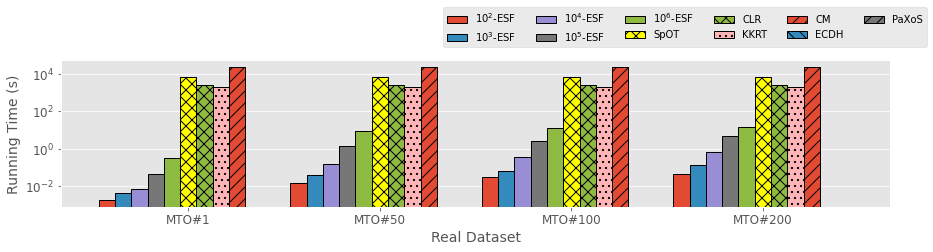

In [6]:
x = np.arange(len(dim))
w=0.085
fig, ax = plt.subplots(figsize=(13, 4))
ax.bar(x-5*w   , k_time["10^2-ESF"], color='#E24A33',width=w, label="$10^2$-ESF", edgecolor='k', linewidth=1)
ax.bar(x-4*w   , k_time["10^3-ESF"], color='#348ABD',width=w, label="$10^3$-ESF", edgecolor='k', linewidth=1)
ax.bar(x-3*w   , k_time["10^4-ESF"], color='#988ED5',width=w, label="$10^4$-ESF", edgecolor='k', linewidth=1)
ax.bar(x-2*w   , k_time["10^5-ESF"], color='#777777',width=w, label="$10^5$-ESF", edgecolor='k', linewidth=1)
ax.bar(x-w     , k_time["10^6-ESF"], color='#8EBA42', width=w, label="$10^6$-ESF", edgecolor='k', linewidth=1)
ax.bar(x       , k_time["SpOT"], color='#FFFF00', width=w, label="SpOT", edgecolor='k', linewidth=1, hatch="xx")
ax.bar(x+w     , k_time["CLR"], color="#8EBA42", width=w, label="CLR", edgecolor='k', linewidth=1, hatch="xx")
ax.bar(x+w*2   , k_time["KKRT"], color="#FFB5B8", width=w, label="KKRT", edgecolor='k', linewidth=1, hatch="..")
ax.bar(x+w*3   , k_time["CM"], color="#E24A33", width=w, label="CM", edgecolor='k', linewidth=1, hatch="//")
ax.bar(x+w*4   , k_time["DH"], color="#348ABD", width=w, label="ECDH", edgecolor='k', linewidth=1, hatch="\\\\")
ax.bar(x+w*5   , k_time["PaXoS"], color="#777777", width=w, label="PaXoS", edgecolor='k', linewidth=1, hatch="//")

ax.set_yscale('log')
ax.set_ylabel('Running Time (s)', fontsize=14)
ax.set_xlabel('Real Dataset', fontsize=14)
plt.xticks(x, labels=dim, fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis = 'x')
# plt.legend(ncol=6, loc='upper center', fontsize=10)
plt.legend(ncol=6, loc=1, bbox_to_anchor=(1.05,1.4), fontsize=10)
plt.tight_layout()
plt.savefig("legend_real_k.svg")

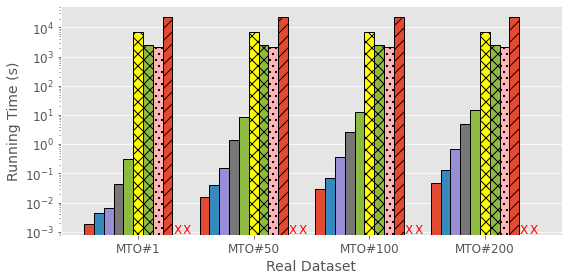

In [7]:
x = np.arange(len(dim))
w=0.085
fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(x-5*w   , k_time["10^2-ESF"], width=w, label="$10^2$-ESF", edgecolor='k', linewidth=1)
ax.bar(x-4*w   , k_time["10^3-ESF"], width=w, label="$10^3$-ESF", edgecolor='k', linewidth=1)
ax.bar(x-3*w   , k_time["10^4-ESF"], width=w, label="$10^4$-ESF", edgecolor='k', linewidth=1)
ax.bar(x-2*w   , k_time["10^5-ESF"], width=w, label="$10^5$-ESF", edgecolor='k', linewidth=1)
ax.bar(x-w     , k_time["10^6-ESF"], color='#8EBA42', width=w, label="$10^6$-ESF", edgecolor='k', linewidth=1)
ax.bar(x       , k_time["SpOT"], color='#FFFF00', width=w, label="SpOT", edgecolor='k', linewidth=1, hatch="xx")
ax.bar(x+w     , k_time["CLR"], color="#8EBA42", width=w, label="CLR", edgecolor='k', linewidth=1, hatch="xx")
ax.bar(x+w*2   , k_time["KKRT"], color="#FFB5B8", width=w, label="KKRT", edgecolor='k', linewidth=1, hatch="..")
ax.bar(x+w*3   , k_time["CM"], color="#E24A33", width=w, label="ECDH", edgecolor='k', linewidth=1, hatch="//")
ax.bar(x+w*4   , k_time["DH"], color="#348ABD", width=w, label="PaXoS", edgecolor='k', linewidth=1, hatch="\\\\")
ax.bar(x+w*5   , k_time["PaXoS"], color="#777777", width=w, label="CM", edgecolor='k', linewidth=1, hatch="//")
# ax.plot([x+4*w], [0.0001], color='r', marker='X', markersize=8)
# ax.plot([x+5*w], [0.0001], color='r', marker='X', markersize=8)
for i,j in zip(x, k_time["DH"]):
    plt.text(i+w*4,j+0.0007,"X", ha='center',va='bottom', fontsize=12, color='r')
for i,j in zip(x, k_time["PaXoS"]):
    plt.text(i+w*5,j+0.0007,"X", ha='center',va='bottom', fontsize=12, color='r')
ax.set_yscale('log')
ax.set_ylabel('Running Time (s)', fontsize=14)
ax.set_xlabel('Real Dataset', fontsize=14)
plt.xticks(x, labels=dim, fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis = 'x')
# plt.legend(ncol=6, loc='upper center', fontsize=10)
# plt.legend(ncol=11, loc=1, bbox_to_anchor=(1.05,1.2), fontsize=10)
plt.tight_layout()
plt.savefig("real_k_time.pdf")

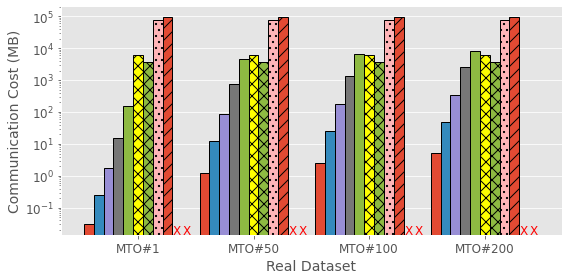

In [8]:
x = np.arange(len(dim))
w=0.085
fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(x-5*w   , k_cost["10^2-ESF"], width=w, label="$10^2$-ESF", edgecolor='k', linewidth=1)
ax.bar(x-4*w   , k_cost["10^3-ESF"], width=w, label="$10^3$-ESF", edgecolor='k', linewidth=1)
ax.bar(x-3*w   , k_cost["10^4-ESF"], width=w, label="$10^4$-ESF", edgecolor='k', linewidth=1)
ax.bar(x-2*w   , k_cost["10^5-ESF"], width=w, label="$10^5$-ESF", edgecolor='k', linewidth=1)
ax.bar(x-w     , k_cost["10^6-ESF"], color='#8EBA42', width=w, label="$10^6$-ESF", edgecolor='k', linewidth=1)
ax.bar(x       , k_cost["SpOT"], color='#FFFF00', width=w, label="SpOT", edgecolor='k', linewidth=1, hatch="xx")
ax.bar(x+w     , k_cost["CLR"], color="#8EBA42", width=w, label="CLR", edgecolor='k', linewidth=1, hatch="xx")
ax.bar(x+w*2   , k_cost["KKRT"], color="#FFB5B8", width=w, label="KKRT", edgecolor='k', linewidth=1, hatch="..")
ax.bar(x+w*3   , k_cost["CM"], color="#E24A33", width=w, label="ECDH", edgecolor='k', linewidth=1, hatch="//")
ax.bar(x+w*4   , k_cost["DH"], color="#348ABD", width=w, label="PaXoS", edgecolor='k', linewidth=1, hatch="\\\\")
ax.bar(x+w*5   , k_cost["PaXoS"], color="#777777", width=w, label="CM", edgecolor='k', linewidth=1, hatch="//")
# ax.plot([x+3*w], [0.0001], color='r', marker='X', markersize=8)
# ax.plot([x+4*w], [0.0001], color='r', marker='X', markersize=8)
for i,j in zip(x, k_cost["DH"]):
    plt.text(i+w*4,j+0.012,"X", ha='center',va='bottom', fontsize=12, color='r')
for i,j in zip(x, k_cost["PaXoS"]):
    plt.text(i+w*5,j+0.012,"X", ha='center',va='bottom', fontsize=12, color='r')
ax.set_yscale('log')
ax.set_ylabel('Communication Cost (MB)', fontsize=14)
ax.set_xlabel('Real Dataset', fontsize=14)
plt.xticks(x, labels=dim, fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis = 'x')
# plt.legend(ncol=6, loc='upper center', fontsize=10)
plt.tight_layout()
plt.savefig("real_k_cost.pdf")